In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('GS.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-26,177.240005,178.639999,172.320007,172.410004,159.930313,11811700
2015-02-02,172.990005,184.619995,172.259995,183.429993,170.152634,15408000
2015-02-09,181.690002,191.330002,181.149994,189.000000,175.319473,14864900
2015-02-16,188.779999,191.639999,187.050003,191.509995,177.647766,7761500
2015-02-23,190.740005,193.279999,189.270004,189.789993,176.052261,12115800


In [4]:
data.shape

(263, 6)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


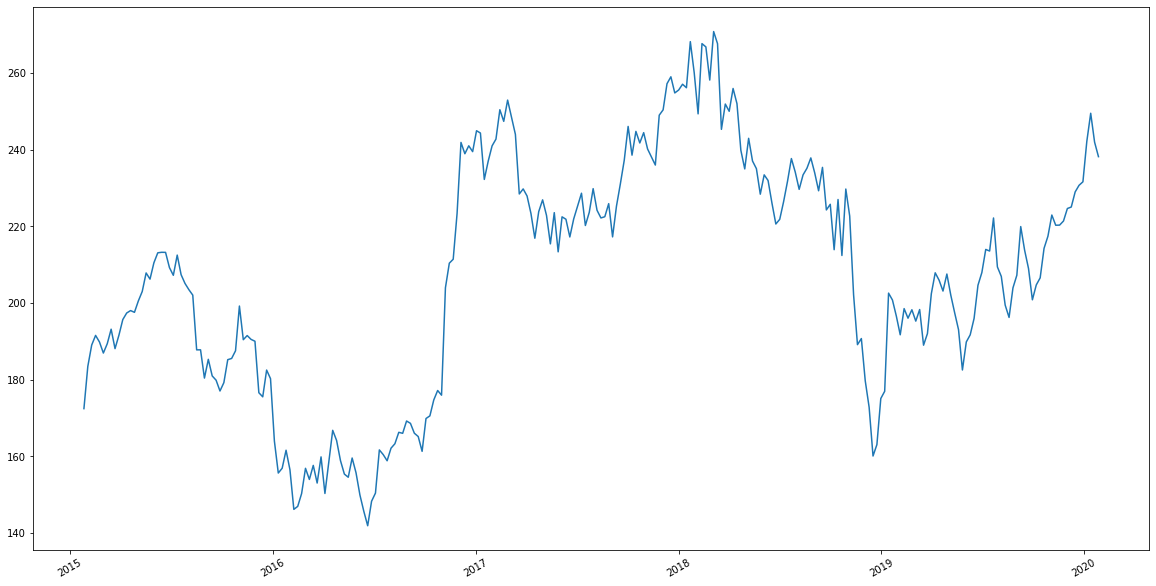

In [5]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=30)
plt.plot(data['Close'])

In [6]:
alpha = 0.3
values = [data['Close'].values[0]]
for i in range(1, data.shape[0]):
    values.append(
        (1-alpha) * values[-1] + alpha * data['Close'].values[i])

In [7]:
data['Exp_smoothing_close'] = values

In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Exp_smoothing_close
Date,,,,,,,
2015-01-26,177.240005,178.639999,172.320007,172.410004,159.930313,11811700,172.410004
2015-02-02,172.990005,184.619995,172.259995,183.429993,170.152634,15408000,175.716001
2015-02-09,181.690002,191.330002,181.149994,189.000000,175.319473,14864900,179.701200
2015-02-16,188.779999,191.639999,187.050003,191.509995,177.647766,7761500,183.243839
2015-02-23,190.740005,193.279999,189.270004,189.789993,176.052261,12115800,185.207685


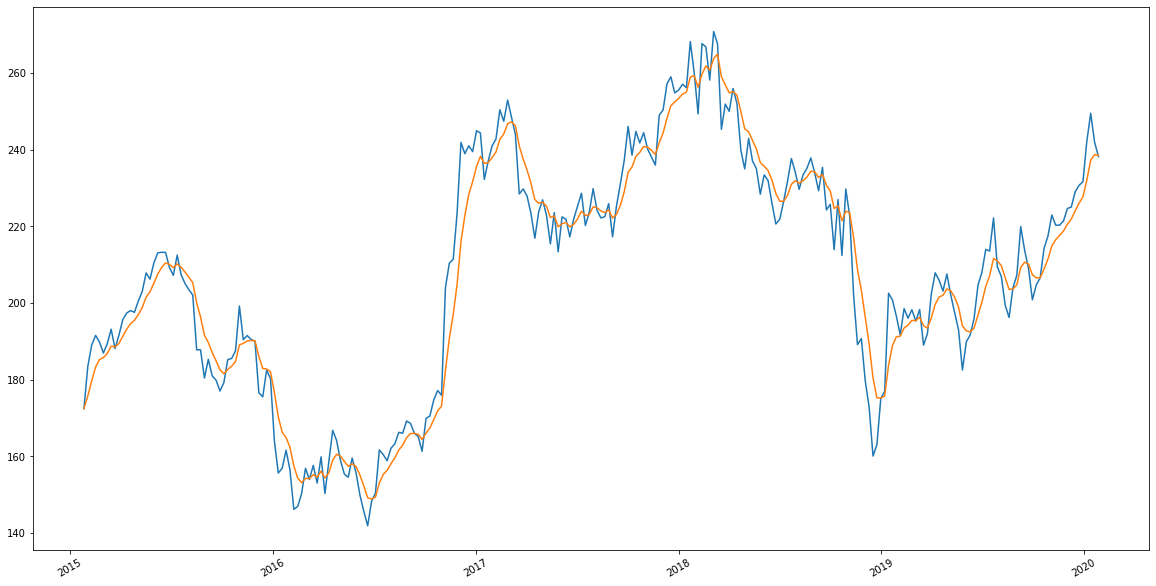

In [9]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=30)
plt.plot(data['Close'])
plt.plot(data['Exp_smoothing_close'])

In [17]:
values = [0]
for i in range(1, data.shape[0]):
    values.append(
        data['Close'].values[i] - data['Close'].values[i-1]
    )

In [18]:
len(values)

263

In [19]:
data['Close_no_trend'] = values

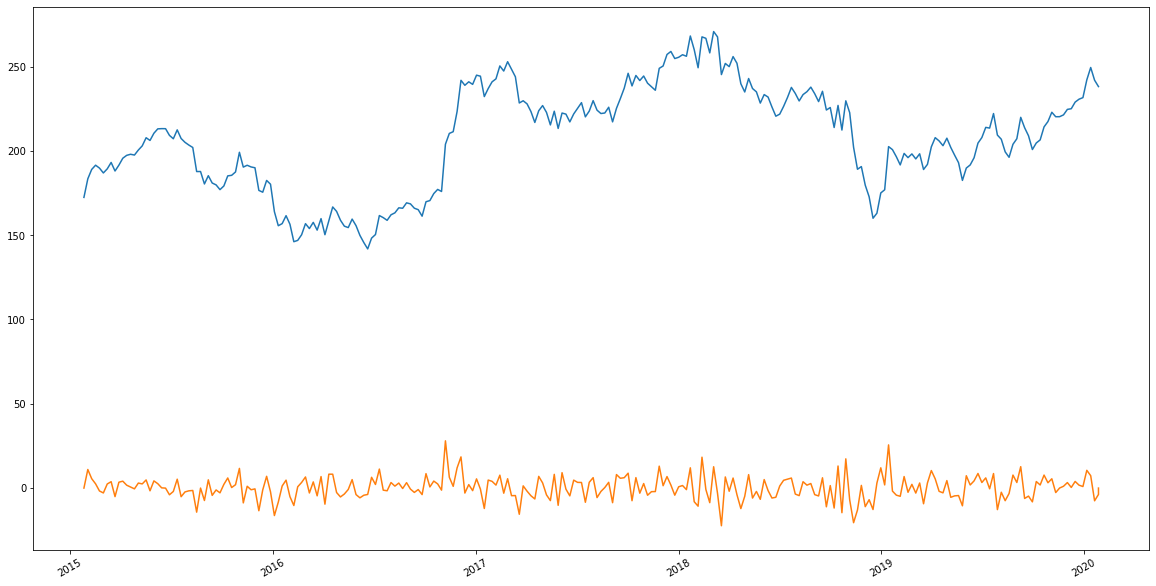

In [20]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=30)
plt.plot(data['Close'])
plt.plot(data['Close_no_trend'])

In [26]:
values = [0]
for i in range(1, data.shape[0]):
    values.append(
        np.log(data['Close'].values[i] / data['Close'].values[i-1])
    )

In [27]:
data['Close_log_returns'] = values
data.head()

,Open,High,Low,Close,Adj Close,Volume,Exp_smoothing_close,Close_no_trend,Close_log_returns
Date,,,,,,,,,
2015-01-26,177.240005,178.639999,172.320007,172.410004,159.930313,11811700,172.410004,0.000000,0.000000
2015-02-02,172.990005,184.619995,172.259995,183.429993,170.152634,15408000,175.716001,11.019989,0.061958
2015-02-09,181.690002,191.330002,181.149994,189.000000,175.319473,14864900,179.701200,5.570007,0.029914
2015-02-16,188.779999,191.639999,187.050003,191.509995,177.647766,7761500,183.243839,2.509995,0.013193
2015-02-23,190.740005,193.279999,189.270004,189.789993,176.052261,12115800,185.207685,-1.720002,-0.009022


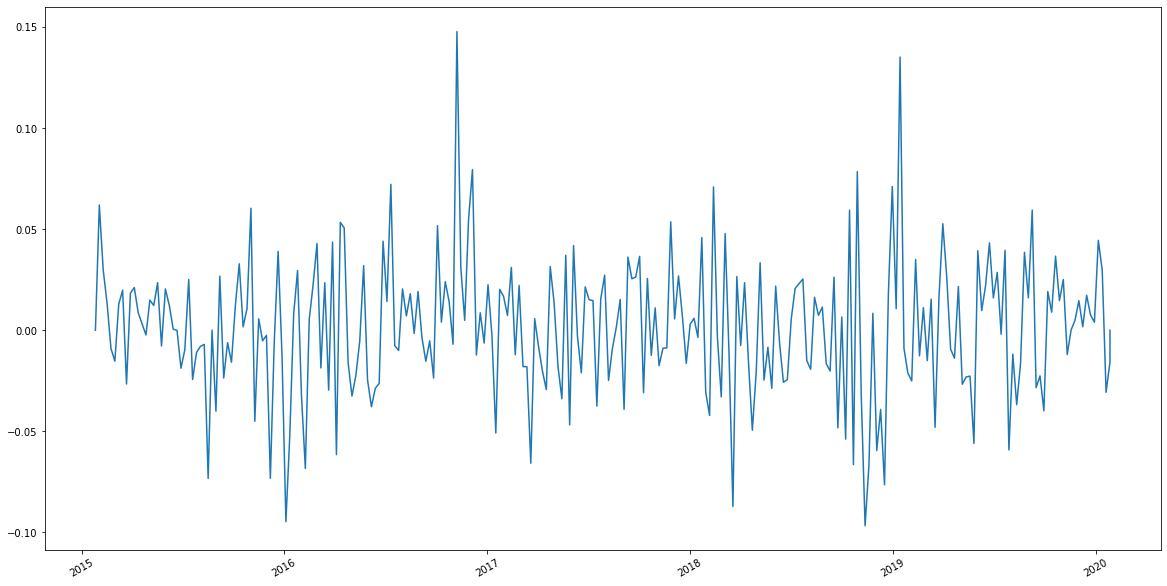

In [28]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=30)
plt.plot(data['Close_log_returns'])